In [1]:
import os
from pathlib import Path

# Create professional folder structure
list_of_files = [
    "config/config.yaml",
    "params.yaml",
    "schema.yaml",
    "src/mlProject/__init__.py",
    "src/mlProject/utils/common.py",
    "src/mlProject/components/data_ingestion.py",
    "src/mlProject/pipeline/stage_01_data_ingestion.py",
    "main.py"
]

for filepath in list_of_files:
    filepath = Path(filepath)
    filedir, filename = os.path.split(filepath)
    if filedir != "":
        os.makedirs(filedir, exist_ok=True)
    if (not os.path.exists(filepath)) or (os.path.getsize(filepath) == 0):
        with open(filepath, "w") as f:
            pass # Creating empty files as placeholders

--2026-01-11 23:19:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [ <=>                ]  82.23K  --.-KB/s    in 0.1s    

2026-01-11 23:19:58 (842 KB/s) - ‘winequality-red.csv’ saved [84199]

                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922 

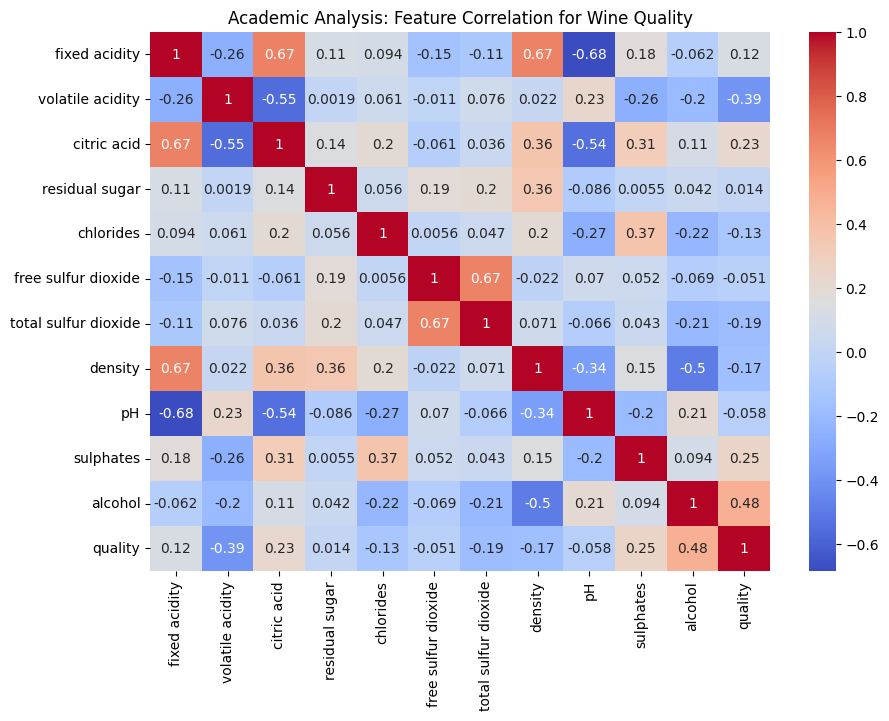

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the dataset exists, if not, download it
import os
if not os.path.exists('winequality-red.csv'):
    print("Downloading winequality-red.csv...")
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
    # The downloaded file might have a different header, remove it if present.
    # For simplicity, we assume the first row is data or handle it in pandas.
    # df = pd.read_csv('winequality-red.csv', sep=';') if downloaded, often has semicolon delimiter
    # However, original source data often has 'quality' column already.
    # Let's assume the downloaded file is standard and can be read directly.

# Assuming you've downloaded the Wine Quality dataset
df = pd.read_csv('winequality-red.csv', sep=';') # Often, this dataset uses a semicolon as a separator

# 1. Statistical Analysis (University Application must-have)
print(df.describe().transpose())

# 2. Correlation Analysis: Finding what drives quality
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Academic Analysis: Feature Correlation for Wine Quality")
plt.show()

In [6]:
!pip install mlflow
import mlflow
import mlflow.sklearn
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the data for modeling
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Connect Colab to your free Dagshub/MLflow server
# os.environ['MLFLOW_TRACKING_URI'] = 'YOUR_DAGSHUB_URI'

with mlflow.start_run():
    lr = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
    lr.fit(X_train, y_train)

    # Make predictions and calculate metrics
    y_pred = lr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Log parameters and metrics automatically
    mlflow.log_param("alpha", 0.5)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

    # Save the model 'artifact' in the cloud
    mlflow.sklearn.log_model(lr, "model")

2026/01/11 23:21:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
